<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido: Arellys Soria &bull; Fecha: 1-dic-2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [32]:
# Paquetes necesarios
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score




---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [6]:


url = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"

df = pd.read_csv(url, sep=r"\s+", header=None)

df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO",
    "B", "LSTAT", "MEDV"
]

print(df.head())
print(df.shape)



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


In [7]:
# Nombres de las columnas según la descripción del dataset
column_names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV"
]

In [8]:
print("Número de atributos:", df.shape[1])
print("\nNombres de los atributos:")
print(df.columns.tolist())


Número de atributos: 14

Nombres de los atributos:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [9]:
print("Número de filas:", df.shape[0])


Número de filas: 506


In [10]:
print("Valores faltantes por columna:")
print(df.isna().sum())


Valores faltantes por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


La variable categorica es CHAS (mide si esta cerca del rio 1, y si no 0)

In [11]:
print("Frecuencia de CHAS:")
print(df['CHAS'].value_counts())



Frecuencia de CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64


In [12]:
print("\nFrecuencia porcentual:")
print(df['CHAS'].value_counts(normalize=True) * 100)



Frecuencia porcentual:
CHAS
0    93.083004
1     6.916996
Name: proportion, dtype: float64


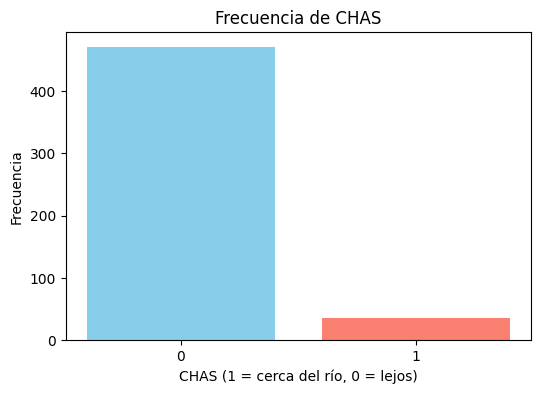

In [13]:
frecuencias = df['CHAS'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(frecuencias.index.astype(str), frecuencias.values, color=['skyblue','salmon'])
plt.title("Frecuencia de CHAS")
plt.xlabel("CHAS (1 = cerca del río, 0 = lejos)")
plt.ylabel("Frecuencia")
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

La mayoría de zonas en Boston no están directamente pegadas al río.
Solo unas pocas viviendas tienen ese privilegio.

**Variables numéricas**

In [14]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [15]:
print("MEDIA:")
print(df[['INDUS','AGE','MEDV']].mean())

print("\nMEDIANA:")
print(df[['INDUS','AGE','MEDV']].median())

print("\nDESVIACIÓN ESTÁNDAR:")
print(df[['INDUS','AGE','MEDV']].std())


MEDIA:
INDUS    11.136779
AGE      68.574901
MEDV     22.532806
dtype: float64

MEDIANA:
INDUS     9.69
AGE      77.50
MEDV     21.20
dtype: float64

DESVIACIÓN ESTÁNDAR:
INDUS     6.860353
AGE      28.148861
MEDV      9.197104
dtype: float64


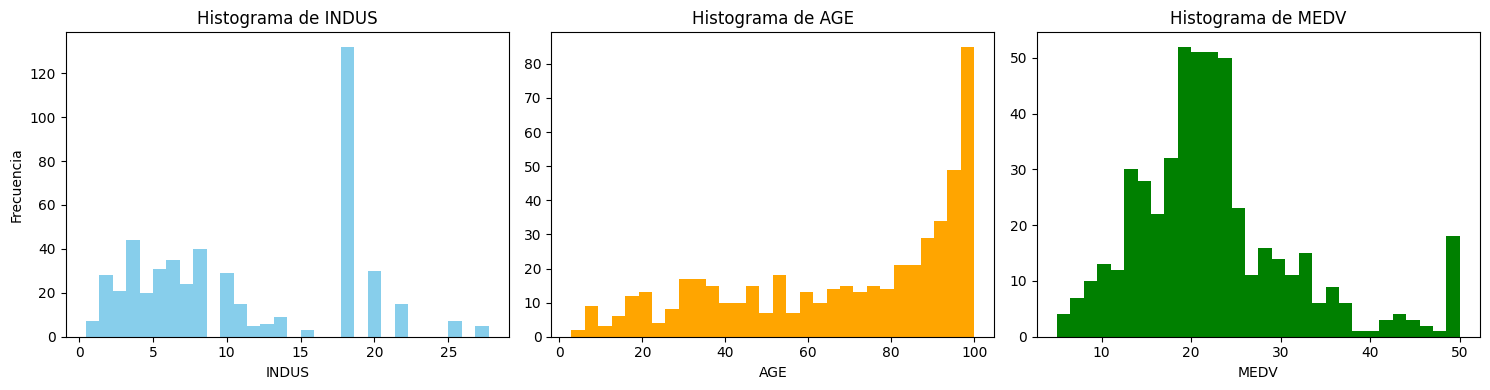

In [16]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(df['INDUS'], bins=30, color='skyblue')
plt.title("Histograma de INDUS")
plt.xlabel("INDUS")
plt.ylabel("Frecuencia")

plt.subplot(1,3,2)
plt.hist(df['AGE'], bins=30, color='orange')
plt.title("Histograma de AGE")
plt.xlabel("AGE")

plt.subplot(1,3,3)
plt.hist(df['MEDV'], bins=30, color='green')
plt.title("Histograma de MEDV")
plt.xlabel("MEDV")

plt.tight_layout()
plt.show()


INDUS

La mayoría de barrios en Boston NO son industriales.
Muy pocos barrios tienen mucha industria (cola larga a la derecha).
Esas zonas son menos atractivas para vivir.

AGE

Muchas zonas tienen casas muy antiguas
La ciudad mezcla barrios muy antiguos con zonas más modernas, esto explicando la variación en edad.

MEDV

La mayoría de viviendas están en precios medios, entre 20 y 30.
Esto indica que la mayor parte de Boston era clase media.

Hay pocas casas muy baratas (cola a la izquierda).
Esto indica que no hay tanta pobreza extrema en los barrios analizados.

Hay un montón de casas con valor 50 (siendo este el maximo , en el data set, es decir , con mayor datos se podriamos seguir explorando las casas de alto valor)

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

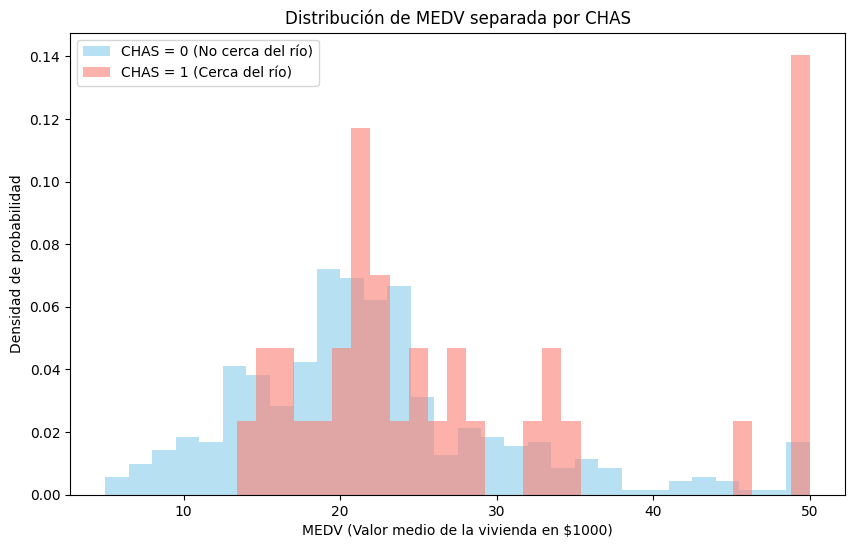

In [17]:
# Separar los datos según CHAS
medv_chas_0 = df[df['CHAS'] == 0]['MEDV']
medv_chas_1 = df[df['CHAS'] == 1]['MEDV']

plt.figure(figsize=(10,6))

# Histograma para CHAS = 0
plt.hist(medv_chas_0, bins=30, alpha=0.6, density=True,
         color='skyblue', label='CHAS = 0 (No cerca del río)')

# Histograma para CHAS = 1
plt.hist(medv_chas_1, bins=30, alpha=0.6, density=True,
         color='salmon', label='CHAS = 1 (Cerca del río)')

plt.xlabel("MEDV (Valor medio de la vivienda en $1000)")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución de MEDV separada por CHAS")
plt.legend()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Si miramos el histograma, se observa que cuando CHAS = 1 los precios tienden a ser algo más altos que cuando CHAS = 0. Es decir, en la distribución rosa aparecen más casas en la parte alta de MEDV, mientras que en la azul hay más casas en rangos medios y algo más bajos. Esto sugiere que la cercanía al río sí está asociada con un mayor precio medio de la vivienda.

Sin embargo,por sí sola no explica bien la variación de MEDV y, en un modelo de predicción, su capacidad explicativa será menor que la de otras variables continuas más informativas.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [18]:
# Correlación de todos los atributos con MEDV
correlaciones = df.corr()['MEDV'].sort_values(ascending=False)

print(correlaciones)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


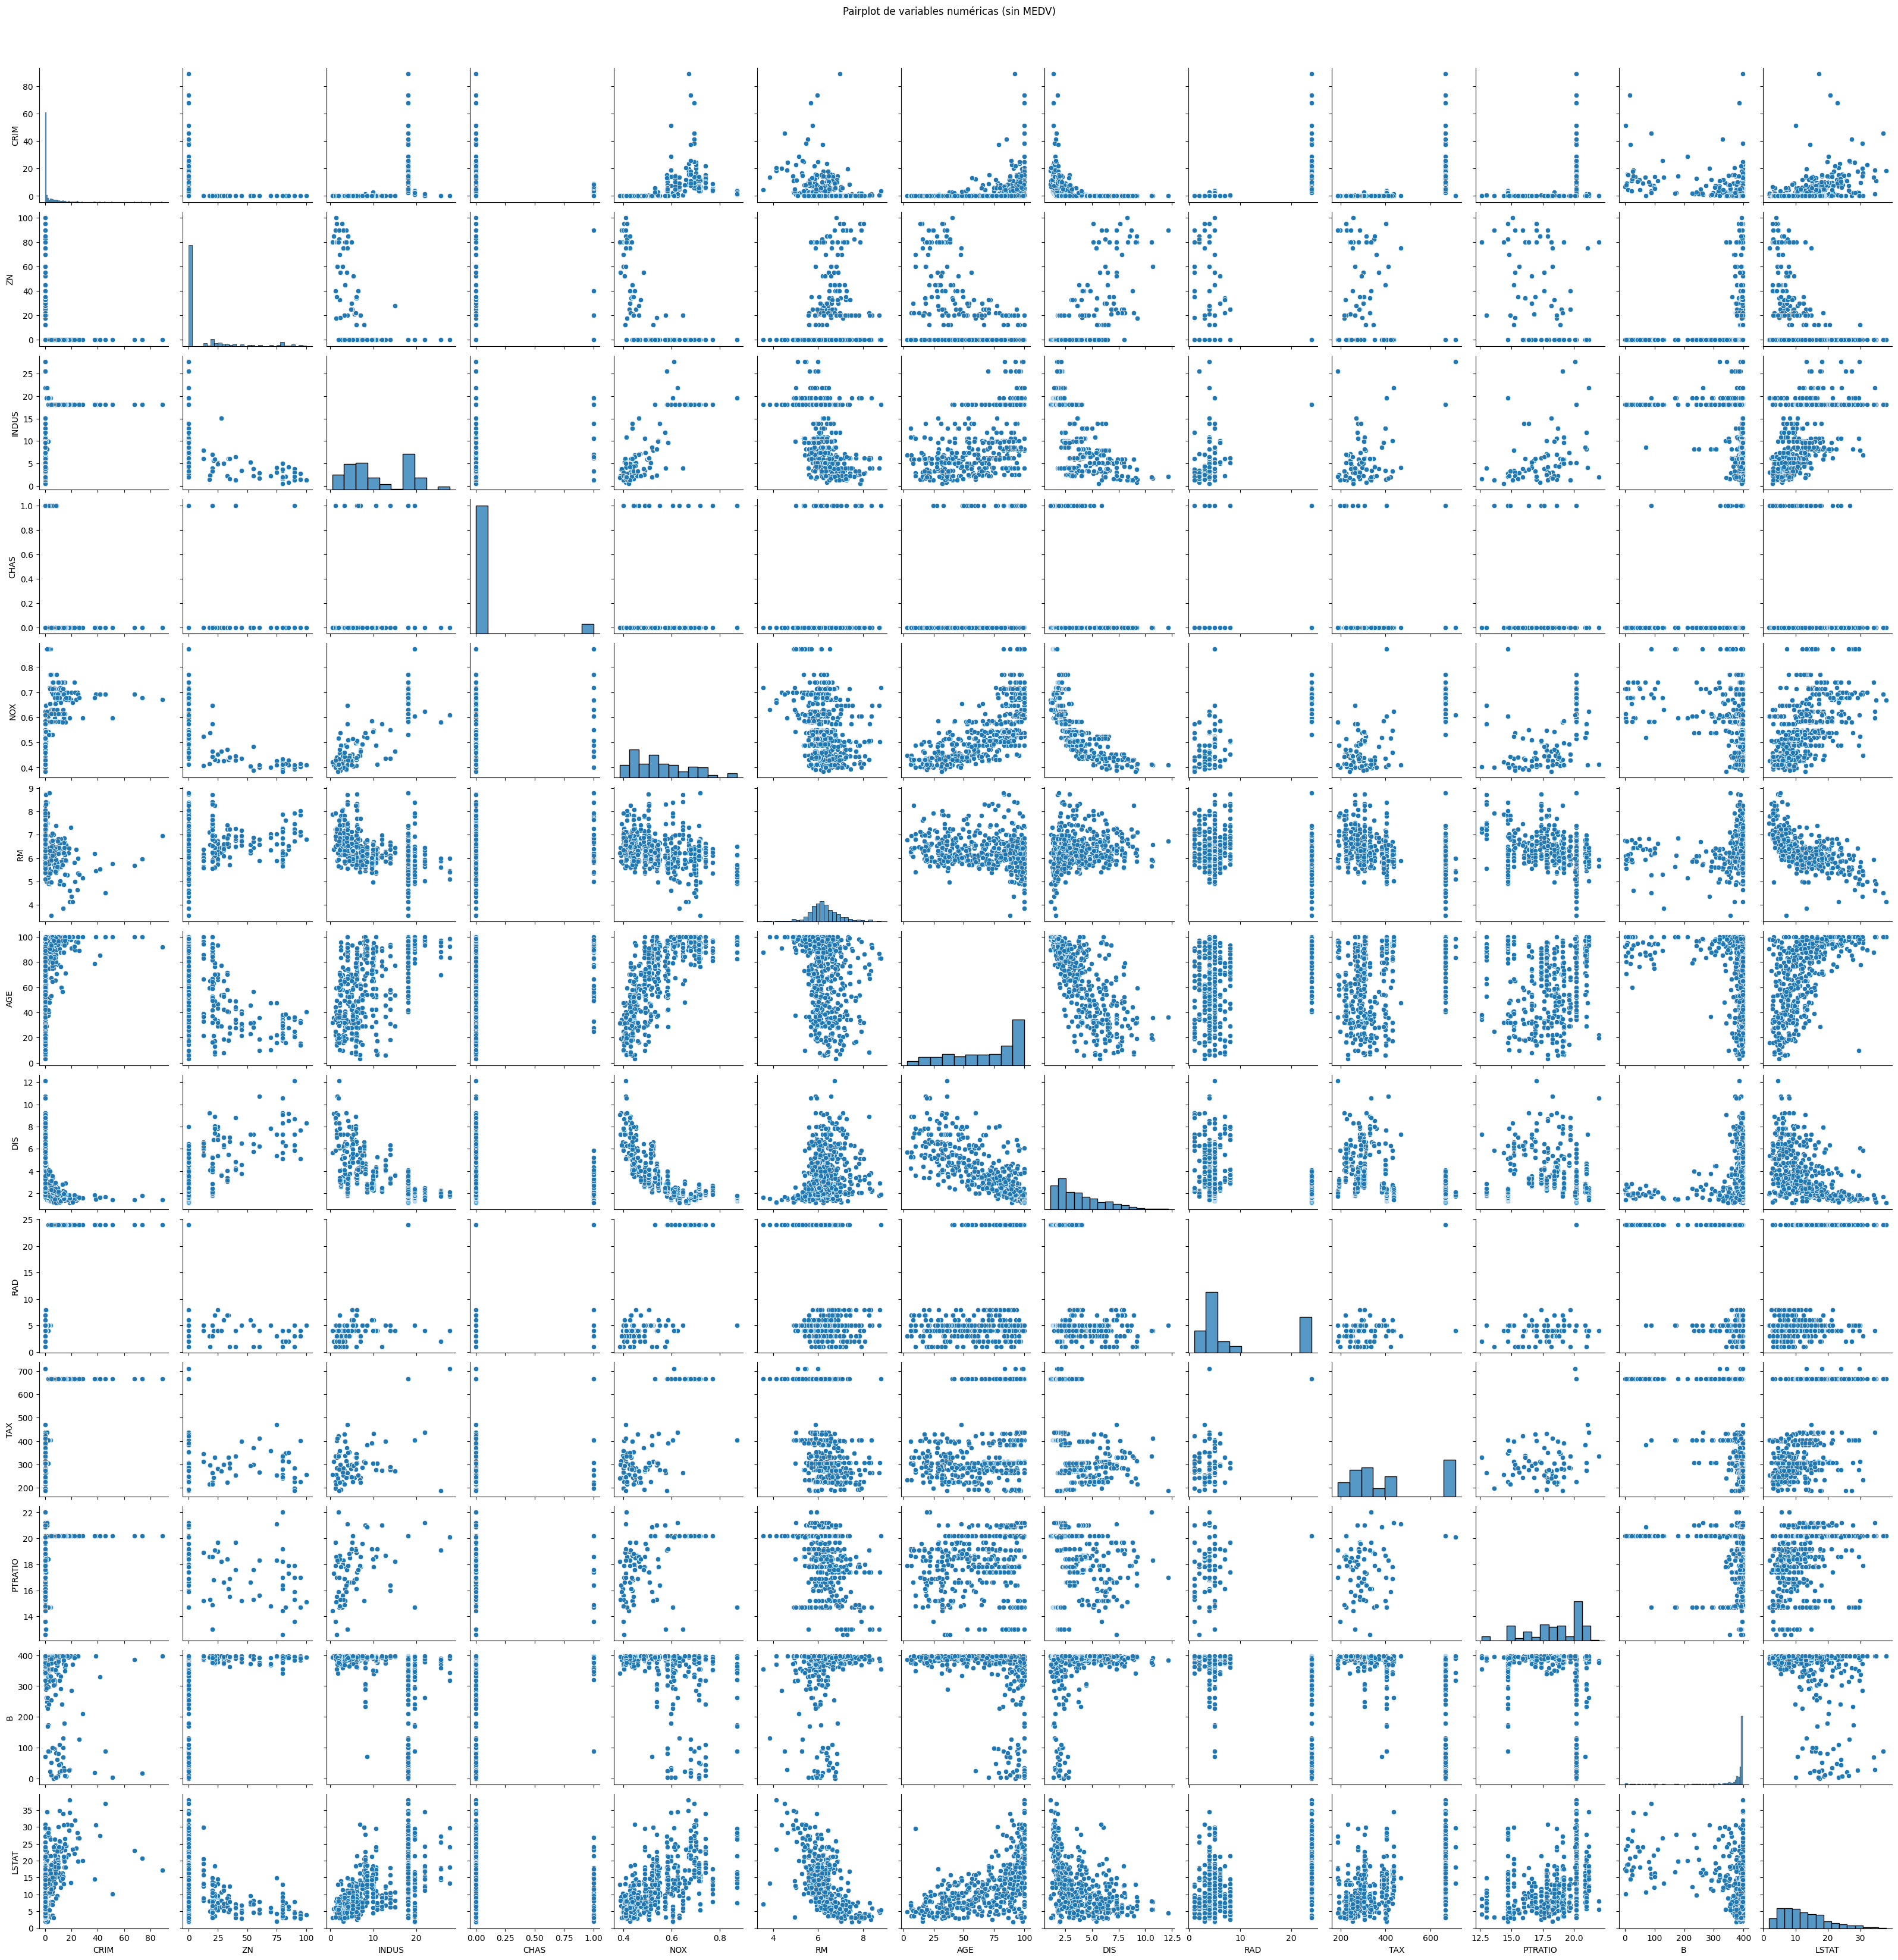

In [19]:
sns.pairplot(
    df,
    vars=[c for c in df.columns if c != "MEDV"],
    diag_kind="hist"
)
plt.suptitle("Pairplot de variables numéricas (sin MEDV)", y=1.02)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


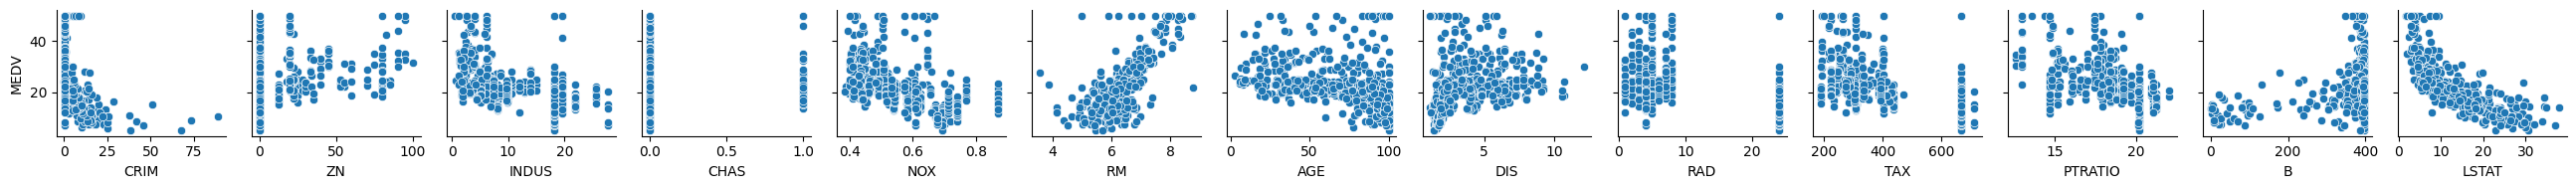

In [20]:
# Ver MEDV frente a todas las demás variables numéricas
vars_explicativas = [c for c in df.columns if c != "MEDV"]

sns.pairplot(
    df,
    x_vars=vars_explicativas,
    y_vars=["MEDV"],
    height=2,
    kind="scatter"
)

plt.tight_layout()
plt.show()


**visualizamos las variables más fuertes correlacionadas con 'MEDV'**

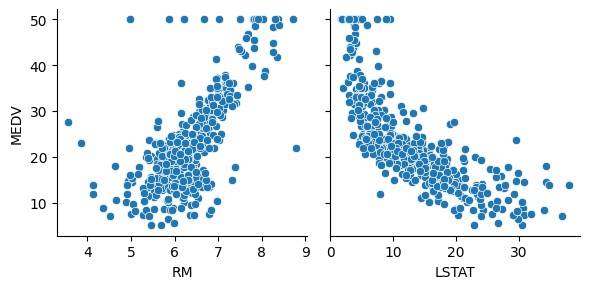

In [21]:
vars_fuertes = ["RM", "LSTAT"]

sns.pairplot(
    df,
    x_vars=vars_fuertes,
    y_vars=["MEDV"],
    height=3,
    kind="scatter"
)

plt.tight_layout()
plt.show()

**Calculamos la correlación**

In [22]:
# Correlación Pearson
r_lstat = df["MEDV"].corr(df["LSTAT"], method="pearson")
r_rm    = df["MEDV"].corr(df["RM"],    method="pearson")

print("Correlación MEDV ~ LSTAT")
print(f"r = {r_lstat:.3f}")
print(f"|r| = {abs(r_lstat):.3f}\n")

print("Correlación MEDV ~ RM")
print(f"r = {r_rm:.3f}")
print(f"|r| = {abs(r_rm):.3f}")

Correlación MEDV ~ LSTAT
r = -0.738
|r| = 0.738

Correlación MEDV ~ RM
r = 0.695
|r| = 0.695


Aquí observamos que entre la 'MEDV' Y 'LSTAT' existe una fuerte correlación relación negativa y fuerte, es casi “el espejo social” del barrio, barrios más desfavorecidos tienden a tener viviendas claramente más baratas , de igual manera con 'MEDV' y 'RM' que es fuerte y una gran candidata a variable importante, con solo mirar cuántas habitaciones tiene de media una vivienda, ya te dice bastante del precio.




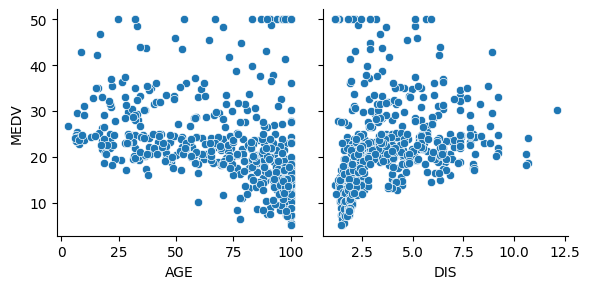

In [23]:
vars_debiles = ["AGE", "DIS"]

sns.pairplot(
    df,
    x_vars=vars_debiles,
    y_vars=["MEDV"],  # MEDV en el eje Y
    height=3,
    kind="scatter"
)

plt.tight_layout()
plt.show()

In [24]:
# Correlación Pearson
r_dis = df["MEDV"].corr(df["DIS"], method="pearson")
r_age    = df["MEDV"].corr(df["AGE"],    method="pearson")

print("Correlación MEDV ~ DIS")
print(f"r = {r_dis:.3f}")
print(f"|r| = {abs(r_dis):.3f}\n")

print("Correlación MEDV ~ AGE")
print(f"r = {r_age:.3f}")
print(f"|r| = {abs(r_age):.3f}")

Correlación MEDV ~ DIS
r = 0.250
|r| = 0.250

Correlación MEDV ~ AGE
r = -0.377
|r| = 0.377


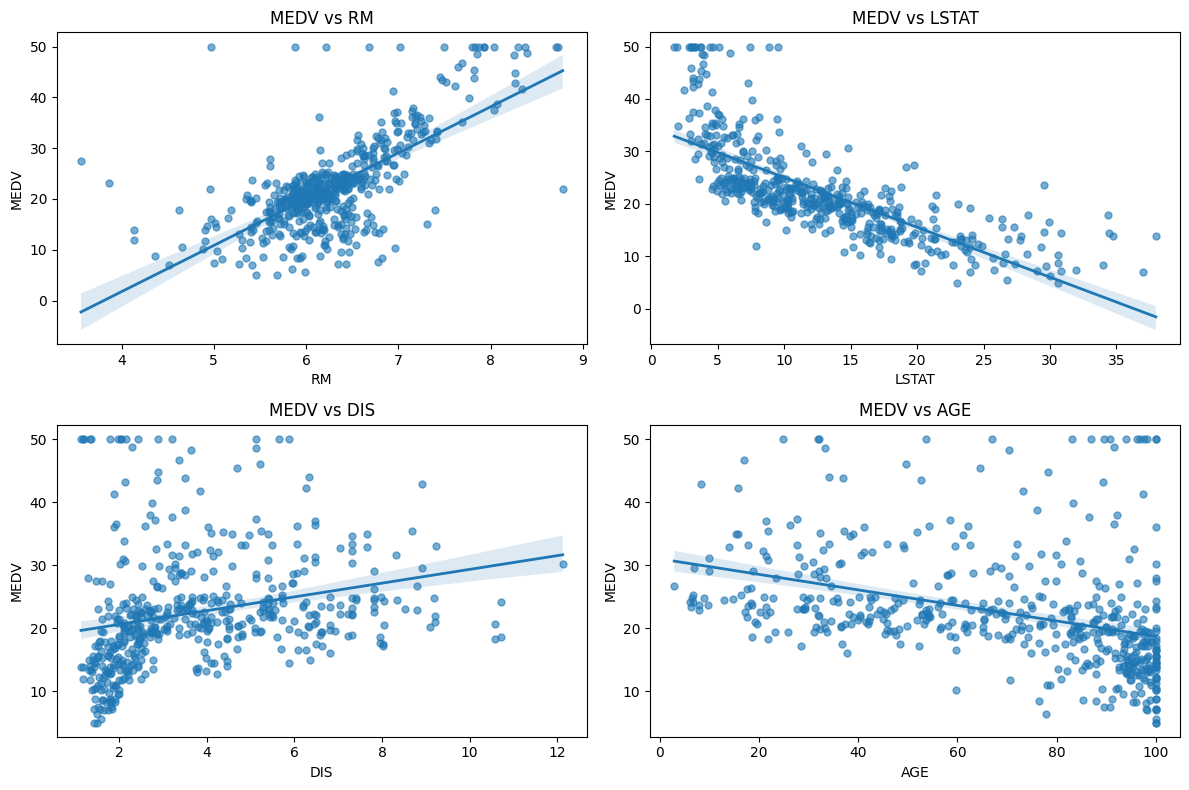

In [ ]:
# Lista de atributos que queremos comparar con MEDV
atributos = ["RM", "LSTAT", "DIS", "AGE"]

# Creamos una figura con 2 filas y 2 columnas de subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.ravel(), atributos):
    sns.regplot(
        data=df,
        x=col,
        y="MEDV",
        ax=ax,
        scatter_kws={"alpha": 0.6, "s": 25},   # puntos un poco transparentes
        line_kws={"linewidth": 2}             # línea de regresión más visible
    )
    ax.set_title(f"MEDV vs {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("MEDV")

plt.tight_layout()
plt.show()

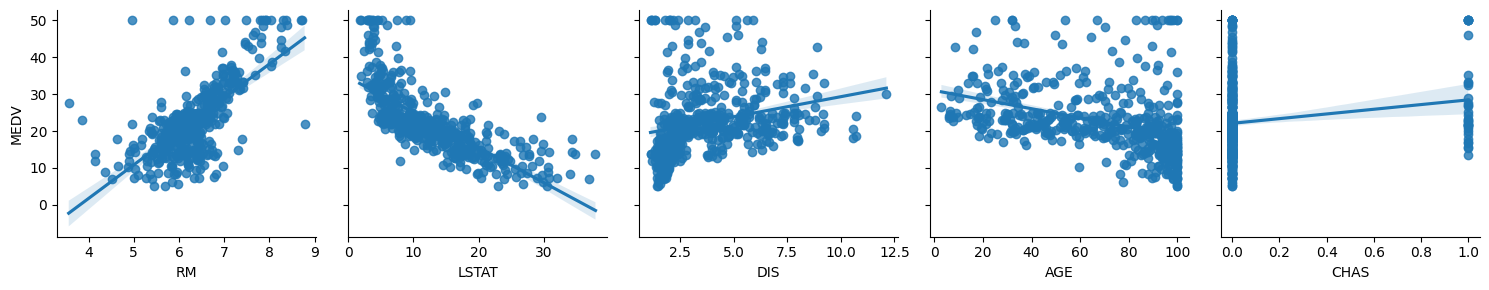

In [ ]:
# Atributos que queremos comparar con MEDV
vars_medv = ["RM", "LSTAT", "DIS", "AGE", "CHAS"]

sns.pairplot(
    df,
    x_vars=vars_medv,
    y_vars=["MEDV"],  # MEDV en el eje Y
    height=3,
    kind="reg"        # scatter + recta de regresión lineal
)

plt.tight_layout()
plt.show()

CHAS introduce una pequeña diferencia media en el precio , pero la variabilidad dentro de cada grupo es grande, por lo que tiene un efecto moderado y una capacidad explicativa mucho menor.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


**Variables de alta correlación con 'MEDV'**

- **'RM' (nº medio de habitaciones)**
Los barrios con más habitaciones por vivienda presentan precios claramente más altos. Es un indicador directo de tamaño y calidad del inmueble, es decir, subir una habitación media en el barrio se asocia con un salto relevante en el valor de mercado.

- **'LSTAT' (% población de bajo estatus)**  
Es la variable con relación más fuerte, porque a medida que aumenta el porcentaje de población de bajo estatus, el precio medio cae de forma pronunciada. LSTAT resume muy bien el nivel socioeconómico y atractivo del barrio, en pocas palabras, barrios más vulnerables , viviendas significativamente más baratas.

**Variables de baja correlación con 'MEDV'**

- **'DIS' (distancia a centros de empleo)**  
La relación es positiva pero débil, los barrios algo más alejados de los centros de trabajo tienden, en promedio, a precios ligeramente mayores, probablemente asociados a zonas residenciales más tranquilas. Sin embargo, no es un factor determinante por sí solo.

- **'AGE' (% viviendas anteriores a 1940)**  
Vemos una relación negativa suave, barrios con parque inmobiliario más antiguo tienden a tener precios algo menores. La antigüedad, por sí sola, no explica el precio, pero sí apunta a la necesidad de renovación y mantenimiento.


Para explicar el valor de la vivienda en Boston, los factores más influyentes no son solo físicos, sino sobre todo sociales. La percepción que tienen los compradores sobre el barrio y la renovación del parque inmobiliario son elementos clave que pueden revalorizar el mercado.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


# Estandarización de los datos

Como primer paso estandarizar las variables numericas, eliminando las variables categoricas 'CHAS' y 'ROD' ya que perderíamos su interpretación al transformarlas y la variable objetivo 'MEDV'.

Esto se hace porque la estandarización solo es adecuada para variables numéricas y debe aplicarse sobre los predictores (X); la variable objetivo 'MEDV' no se transforma, ya que es el valor que el modelo intenta aprender a predecir.

In [ ]:
# Seleccionar solo columnas numéricas
columnas_numericas = df.select_dtypes(include=["int64", "float64"]).columns
print(columnas_numericas)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
# Lista de columnas que NO queremos usar en el PCA
columnas_excluir = ["MEDV", "CHAS", "RAD"]

# Nos quedamos con las numéricas que no están en la lista de exclusión
columnas_para_pca = [c for c in columnas_numericas if c not in columnas_excluir]

print("Columnas usadas para reducción de dimensionalidad (PCA):")
print(columnas_para_pca)

Columnas usadas para reducción de dimensionalidad (PCA):
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [ ]:
X = df[columnas_para_pca]
X.head()


CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3  396.90   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8  396.90   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8  392.83   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7  394.63   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7  396.90   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33

In [ ]:
scaler = StandardScaler()

# Ajusta el scaler a los datos (calcula medias y desviaciones) y luego transforma
X_scaled_array = scaler.fit_transform(X)


In [ ]:
X_scaled = pd.DataFrame(
    X_scaled_array,
    columns=columnas_para_pca,
    index=df.index
)

X_scaled.head()


CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   

        TAX   PTRATIO         B     LSTAT  
0 -0.666608 -1.459000  0.441052 -1.075562  
1 -0.987329 -0.303094  0.441052 -0.492439  
2 -0.987329 -0.303094  0.396427 -1.208727  
3 -1.106115  0.113032  0.416163 -1.361517  
4 -1.106115  0.113032  0.441052 -1.026501

**Aplicar PCA para reducir a 2 dimensiones**

In [ ]:
# 1. Crear el modelo PCA con 2 componentes
pca = PCA(n_components=2, random_state=42)

# 2. Ajustar el PCA a los datos estandarizados y transformarlos
X_pca_array = pca.fit_transform(X_scaled)

# 3. Pasarlo a DataFrame para trabajar más cómodo
X_pca = pd.DataFrame(
    X_pca_array,
    columns=["PC1", "PC2"],   # Primera y segunda componente principal
    index=X_scaled.index
)

# Ver las primeras filas
X_pca.head()

PC1       PC2
0 -1.867500  1.111081
1 -1.214199  0.505923
2 -1.885889  0.959290
3 -2.499546  0.260133
4 -2.335426  0.375320

In [ ]:
# Porcentaje de varianza explicada por cada componente
pca.explained_variance_ratio_


array([0.50432371, 0.11041929])

In [ ]:
#Suma de las dos componentes
pca.explained_variance_ratio_.sum()


np.float64(0.6147430036611652)

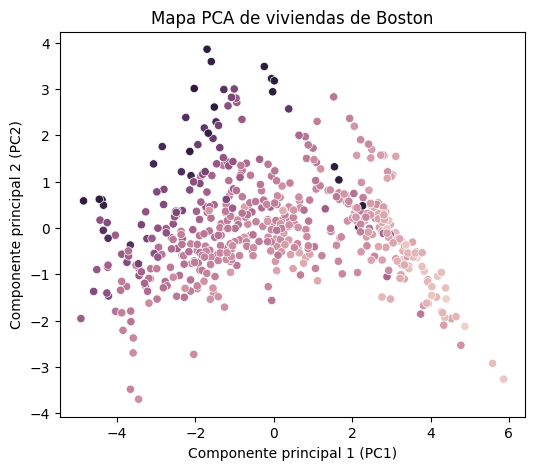

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=X_pca["PC1"],
    y=X_pca["PC2"],
    hue=df["MEDV"],   # coloreamos según el precio de la vivienda
    legend=False
)
plt.xlabel("Componente principal 1 (PC1)")
plt.ylabel("Componente principal 2 (PC2)")
plt.title("Mapa PCA de viviendas de Boston")
plt.show()


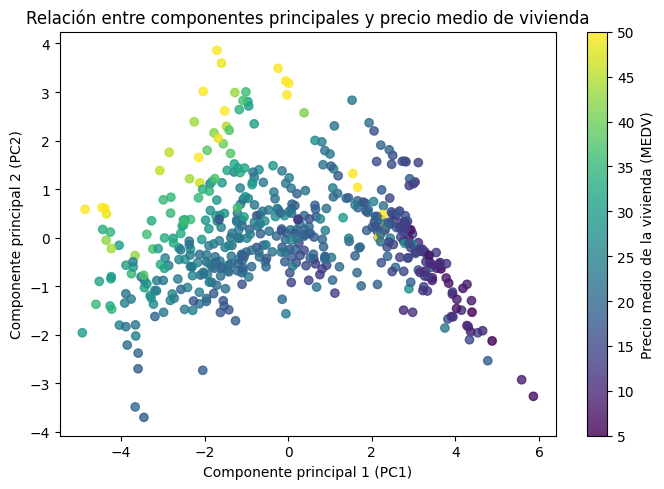

In [ ]:
plt.figure(figsize=(7, 5))

scatter = plt.scatter(
    X_pca["PC1"],          # eje x: primera componente
    X_pca["PC2"],          # eje y: segunda componente
    c=df["MEDV"],          # color según el valor de MEDV
    cmap="viridis",        # mapa de colores (puedes probar "plasma", "coolwarm", etc.)
    alpha=0.8
)

plt.xlabel("Componente principal 1 (PC1)")
plt.ylabel("Componente principal 2 (PC2)")
plt.title("Relación entre componentes principales y precio medio de vivienda")

cbar = plt.colorbar(scatter)
cbar.set_label("Precio medio de la vivienda (MEDV)")

plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


In [ ]:
# features numéricas sin CHAS, RAD ni MEDV
X = df.drop(columns=["MEDV", "CHAS", "RAD"])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_medv = df["MEDV"].values

t-SNE básico con 2 dimensiones

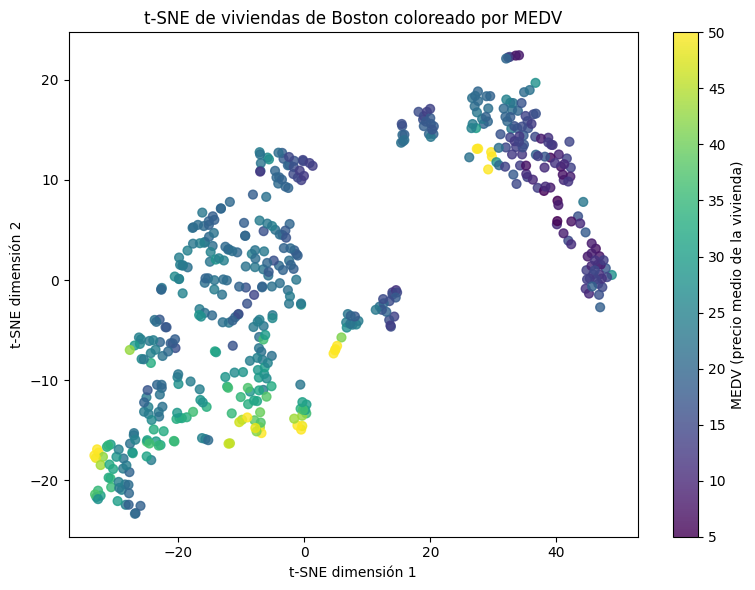

In [ ]:
# 1) Definimos el modelo t-SNE
tsne = TSNE(
    n_components=2,    # queremos 2 dimensiones
    learning_rate=200, # valor típico inicial
    perplexity=30,     # valor típico inicial
    random_state=42    # para que sea reproducible
)

# 2) Ajustamos t-SNE sobre los datos estandarizados
X_tsne = tsne.fit_transform(X_scaled)

# 3) Hacemos el scatter plot coloreando por MEDV
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y_medv,        # colores según MEDV
    cmap="viridis",
    s=40,
    alpha=0.8
)

cbar = plt.colorbar(scatter)
cbar.set_label("MEDV (precio medio de la vivienda)")

plt.xlabel("t-SNE dimensión 1")
plt.ylabel("t-SNE dimensión 2")
plt.title("t-SNE de viviendas de Boston coloreado por MEDV")
plt.tight_layout()
plt.show()

**Experimentar con perplexity y learning_rate**

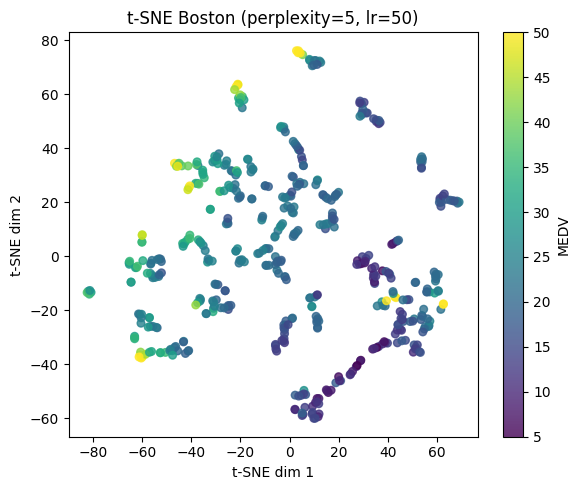

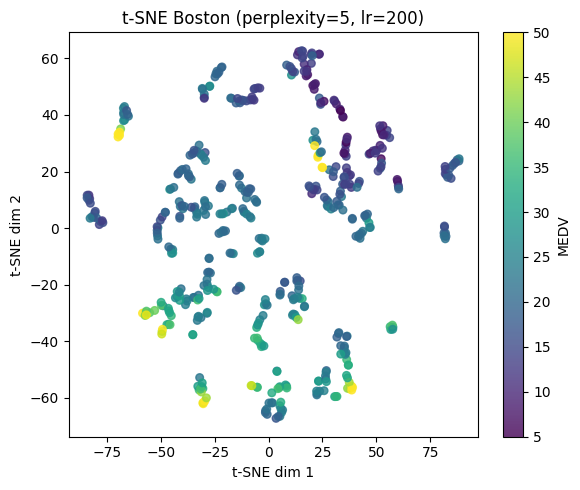

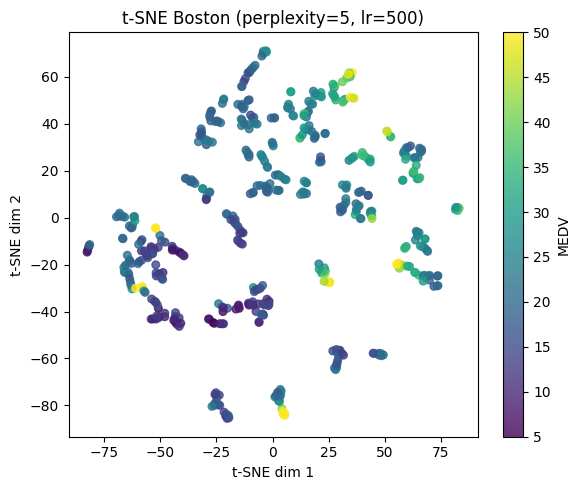

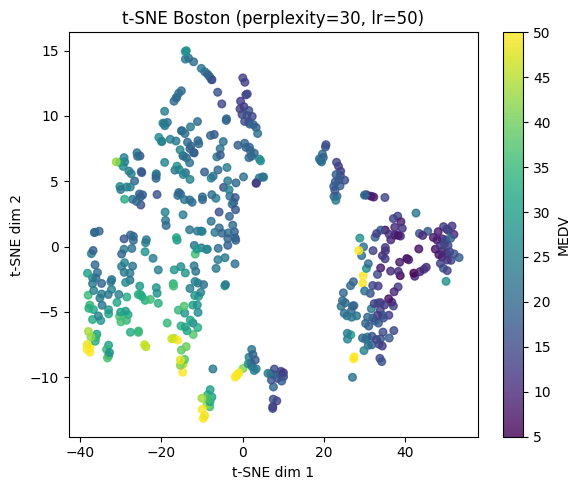

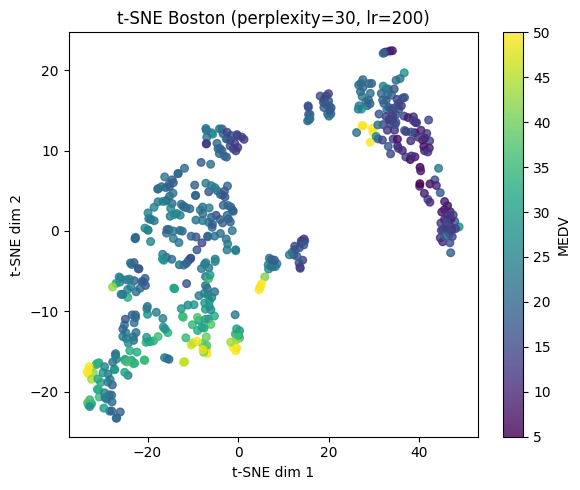

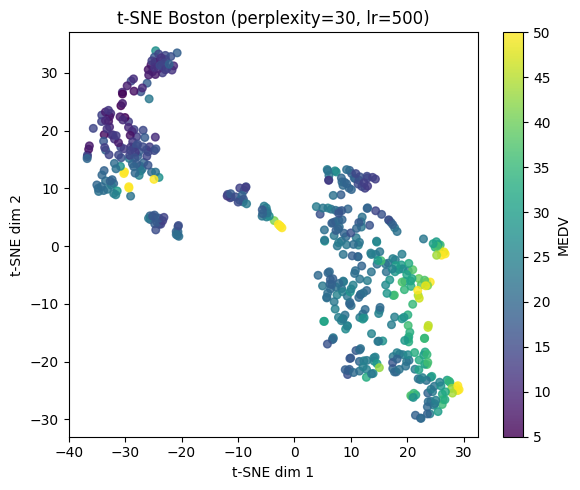

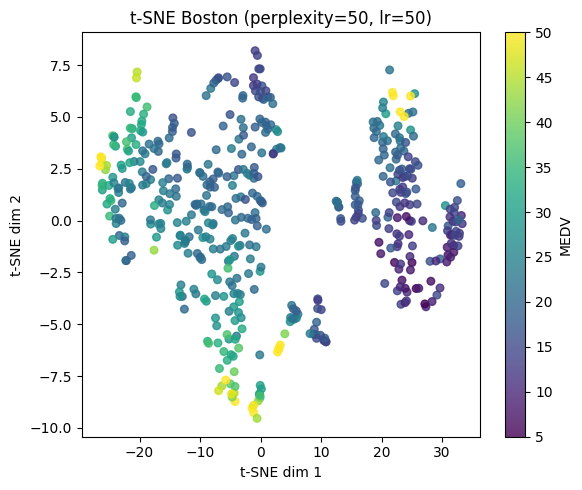

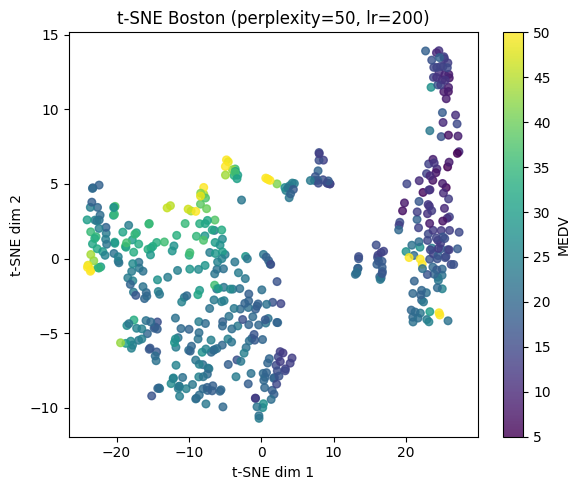

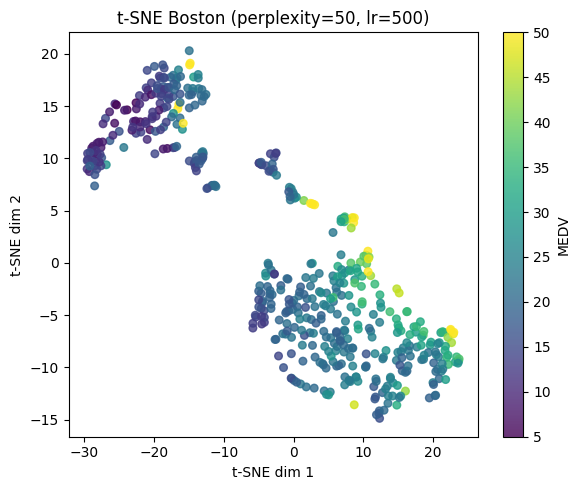

In [ ]:
perplexities = [5, 30, 50]
learning_rates = [50, 200, 500]

for perp in perplexities:
    for lr in learning_rates:
        tsne = TSNE(
            n_components=2,
            perplexity=perp,
            learning_rate=lr,
            random_state=42
        )
        X_tsne = tsne.fit_transform(X_scaled)

        plt.figure(figsize=(6, 5))
        scatter = plt.scatter(
            X_tsne[:, 0],
            X_tsne[:, 1],
            c=y_medv,
            cmap="viridis",
            s=30,
            alpha=0.8
        )
        cbar = plt.colorbar(scatter)
        cbar.set_label("MEDV")

        plt.xlabel("t-SNE dim 1")
        plt.ylabel("t-SNE dim 2")
        plt.title(f"t-SNE Boston (perplexity={perp}, lr={lr})")
        plt.tight_layout()
        plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Sí, la reducción de dimensionalidad funciona: tanto PCA como t-SNE logran comprimir la información de muchas variables de vivienda en solo 2 ejes.

PCA organiza las viviendas a lo largo de un eje que se relaciona de forma bastante clara con el precio medio (MEDV): en el mapa de PCA se ve un gradiente progresivo de precios.

t-SNE agrupa viviendas “parecidas” en pequeñas islas, útil para exploración visual, pero la relación con el precio es más irregular.

Si el objetivo es construir un modelo que prediga MEDV usando solo 2 variables, el **PCA serían la mejor opción**, porque proporcionan una representación más ordenada e interpretable del precio en el plano.


---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [ ]:
columnas = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]


In [ ]:
# X: todos los atributos salvo MEDV (la variable objetivo de regresión)
X = df.drop(columns=["MEDV"])

# Objetivo para regresión
y_medv = df["MEDV"]

# Etiqueta binaria CHAS (la usaremos solo para evaluar K-means)
y_chas = df["CHAS"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_medv_train, y_medv_test, y_chas_train, y_chas_test = train_test_split(
    X, y_medv, y_chas,
    test_size=0.2,
    random_state=4
)


In [ ]:
print("Dimensiones de X:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

print("\nDimensiones de y_medv (regresión):")
print("y_medv_train:", y_medv_train.shape)
print("y_medv_test :", y_medv_test.shape)

print("\nDimensiones de y_chas (para evaluar K-means):")
print("y_chas_train:", y_chas_train.shape)
print("y_chas_test :", y_chas_test.shape)


Dimensiones de X:
X_train: (404, 13)
X_test : (102, 13)

Dimensiones de y_medv (regresión):
y_medv_train: (404,)
y_medv_test : (102,)

Dimensiones de y_chas (para evaluar K-means):
y_chas_train: (404,)
y_chas_test : (102,)


**Estandarizar**

In [ ]:
X_train, X_test, y_medv_train, y_medv_test, y_chas_train, y_chas_test


(         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 192   0.08664  45.0   3.44     0  0.437  7.178  26.3  6.4798    5  398.0   
 138   0.24980   0.0  21.89     0  0.624  5.857  98.2  1.6686    4  437.0   
 251   0.21409  22.0   5.86     0  0.431  6.438   8.9  7.3967    7  330.0   
 13    0.62976   0.0   8.14     0  0.538  5.949  61.8  4.7075    4  307.0   
 256   0.01538  90.0   3.75     0  0.394  7.454  34.2  6.3361    3  244.0   
 ..        ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 385  16.81180   0.0  18.10     0  0.700  5.277  98.1  1.4261   24  666.0   
 197   0.04666  80.0   1.52     0  0.404  7.107  36.6  7.3090    2  329.0   
 439   9.39063   0.0  18.10     0  0.740  5.627  93.9  1.8172   24  666.0   
 174   0.08447   0.0   4.05     0  0.510  5.859  68.7  2.7019    5  296.0   
 122   0.09299   0.0  25.65     0  0.581  5.961  92.9  2.0869    2  188.0   
 
      PTRATIO       B  LSTAT  
 192     15.2  390.49   2.87  
 138     21.

In [ ]:
# 1. Crear el objeto escalador
scaler = StandardScaler()

# 2. Ajustar SOLO con los datos de entrenamiento y transformar
X_train_scaled_np = scaler.fit_transform(X_train)

# 3. Transformar el conjunto de prueba con la misma media y desviación
X_test_scaled_np = scaler.transform(X_test)

# (Opcional pero muy útil) Volver a DataFrame para no perder nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled_np,  columns=X_test.columns,  index=X_test.index)


**Verificación**

In [ ]:
print("Forma original:", X_train.shape)
print("Forma escalada :", X_train_scaled.shape)

X_train.describe().T.head()      # estadísticas originales
X_train_scaled.describe().T.head()  # deberían tener media ~0 y std ~1


Forma original: (404, 13)
Forma escalada : (404, 13)


count          mean      std       min       25%       50%       75%  \
CRIM   404.0  3.957231e-17  1.00124 -0.436912 -0.428233 -0.406707  0.021516   
ZN     404.0 -5.716000e-17  1.00124 -0.479907 -0.479907 -0.479907  0.065626   
INDUS  404.0  2.528231e-16  1.00124 -1.507739 -0.867937 -0.203359  1.022321   
CHAS   404.0 -8.793846e-18  1.00124 -0.256833 -0.256833 -0.256833 -0.256833   
NOX    404.0  1.560908e-16  1.00124 -1.464429 -0.919797 -0.162417  0.765161   

             max  
CRIM   10.046493  
ZN      3.884356  
INDUS   2.427263  
CHAS    3.893584  
NOX     2.671376

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [ ]:
# X = atributos (todas menos MEDV)
X = df.drop(columns=["MEDV"])
# y = variable objetivo
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=4
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (404, 13)
X_test : (102, 13)
y_train: (404,)
y_test : (102,)


In [ ]:
modelo = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [ ]:
# R2 (coefficient of determination)
scores_r2 = cross_val_score(
    modelo,
    X_train, y_train,
    cv=5,
    scoring="r2"
)

print("R2 por fold:", scores_r2)
print("R2 medio   :", scores_r2.mean())
print("R2 std     :", scores_r2.std())

R2 por fold: [0.7211747  0.72037993 0.76136453 0.76497552 0.62148632]
R2 medio   : 0.7178762005911319
R2 std     : 0.05180296809706491


**Validación cruzada con MAE**

In [ ]:
# MAE (Mean Absolute Error) – se usa la versión negativa
scores_mae_neg = cross_val_score(
    modelo,
    X_train, y_train,
    cv=5,
    scoring="neg_mean_absolute_error"
)

# Convertimos a MAE positivo multiplicando por -1
scores_mae = -scores_mae_neg

print("MAE por fold:", scores_mae)
print("MAE medio   :", scores_mae.mean())
print("MAE std     :", scores_mae.std())


MAE por fold: [4.23386736 3.27218315 2.84112046 2.82601914 3.64148384]
MAE medio   : 3.36293478915371
MAE std     : 0.5300787872594982


Utilizando validación cruzada con 5 particiones (cv=5) sobre el conjunto de entrenamiento y un modelo de regresión lineal (con estandarización previa de las variables), se obtuvo un MAE medio de 3.36 (en unidades de MEDV, es decir, miles de dólares) con una desviación estándar de 0.53.
Esto significa que, en promedio, el modelo comete un error de aproximadamente 3.360 dólares al estimar el valor mediano de las viviendas, y que dicho rendimiento es relativamente estable entre las diferentes particiones de la validación cruzada.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [ ]:
modelo_pca = make_pipeline(
    StandardScaler(),      # estandariza todas las variables
    PCA(n_components=2),   # reduce a 2 componentes principales
    LinearRegression()     # regresión lineal sobre las 2 PCs
)

**Validación cruzada con R² usando PCA**

In [ ]:
scores_r2_pca = cross_val_score(
    modelo_pca,
    X_train, y_train,
    cv=5,
    scoring="r2"
)

print("R2 (PCA) por fold:", scores_r2_pca)
print("R2 (PCA) medio   :", scores_r2_pca.mean())
print("R2 (PCA) std     :", scores_r2_pca.std())

R2 (PCA) por fold: [0.44422152 0.54002355 0.58126542 0.65531946 0.39767619]
R2 (PCA) medio   : 0.5237012274866785
R2 (PCA) std     : 0.09284691271377085


**Validación cruzada con MAE usando PCA**

In [ ]:
scores_mae_neg_pca = cross_val_score(
    modelo_pca,
    X_train, y_train,
    cv=5,
    scoring="neg_mean_absolute_error"
)

# Pasar a valores positivos
scores_mae_pca = -scores_mae_neg_pca

print("MAE (PCA) por fold:", scores_mae_pca)
print("MAE (PCA) medio   :", scores_mae_pca.mean())
print("MAE (PCA) std     :", scores_mae_pca.std())


MAE (PCA) por fold: [5.97987572 4.30682336 3.75386908 3.52926505 4.70233562]
MAE (PCA) medio   : 4.454433765661005
MAE (PCA) std     : 0.8668270141576263


Mediante regresión lineal sobre el dataset reducido con PCA a 2 componentes se obtuvo un MAE medio de 4.45 (±0.89) miles de dólares en validación cruzada (cv=5). Frente al modelo con todas las variables (MAE ≈ 3.36), la reducción a 2 dimensiones incrementa el error en unos 1.1 miles de dólares por vivienda y aumenta ligeramente la variabilidad. Esto indica que la reducción drástica de dimensionalidad elimina información relevante para predecir MEDV, por lo que no resulta conveniente si se prioriza la precisión predictiva.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo ha funcionado mejor con el dataset original de 13 atributos (MAE ≈ 3,36 frente a 4,45 con PCA–2D).
El resultado tiene sentido, porque al reducir a dos componentes se pierde información relevante para predecir MEDV.
Sí, está alineado con el ejercicio 3, donde se observó que varias variables individuales tenían una fuerte relación con MEDV y conviene mantenerlas.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [ ]:
# Modelo final: escalado + regresión lineal
modelo_final = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
# Entrenar solo con el conjunto de entrenamiento
modelo_final.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**Generar predicciones sobre el conjunto de test**

In [ ]:
y_pred = modelo_final.predict(X_test)


**Calcular R² y MAE en el conjunto de test**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print(f"R2 en test : {r2_test:.4f}")
print(f"MAE en test: {mae_test:.4f}")  # en miles de dólares


R2 en test : 0.7263
MAE en test: 3.3678


R²: proporción de la variabilidad de MEDV explicada por el modelo en el conjunto de test.

MAE: error medio absoluto en miles de dólares; por ejemplo, MAE = 3.2 ≈ error medio de 3 200 USD por vivienda.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Para un ejecutivo usaría el **MAE**, porque se entiende en términos de negocio: el modelo se equivoca en promedio en X miles de dólares por vivienda. Es una cifra directa en dinero, fácil de comparar con márgenes, comisiones y riesgos, y por eso es la métrica más clara y accionable para tomar decisiones.

Al analista matemático le explicaría el modelo con **R²**, porque es adimensional, muestra qué proporción de la variabilidad de los precios explica el modelo y permite comparar rigurosamente distintas especificaciones y detectar posibles sesgos, conectando el desempeño con la teoría estadística de la regresión.



### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



**Ahora calcularemos CHAS porque es una variable binaria (0/1)**

In [25]:
X = df.drop(columns=["CHAS", "MEDV"])
y = df["CHAS"]

**Dividir en train y test (random_state=4)**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=4,
    stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))


(379, 12) (127, 12)
CHAS
0    0.931398
1    0.068602
Name: proportion, dtype: float64


**Definir el modelo K-means**

In [29]:
kmeans_clf = make_pipeline(
    StandardScaler(),
    KMeans(
        n_clusters=2,
        random_state=4,
        n_init=10
    )
)

# Ajustar el modelo SOLO con los datos de entrenamiento
kmeans_clf.fit(X_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, n_init=10, random_state=4))])

In [30]:
# Clusters asignados en el conjunto de entrenamiento
cluster_labels_train = kmeans_clf.predict(X_train)

mapping = {}
for c in np.unique(cluster_labels_train):
    # índices de las instancias que caen en el cluster c
    mask = cluster_labels_train == c
    # clase mayoritaria real (CHAS) en ese cluster
    majority_class = np.bincount(y_train[mask].astype(int)).argmax()
    mapping[c] = majority_class

mapping

{np.int32(0): np.int64(0), np.int32(1): np.int64(0)}

**Predecir en test y calcular precisión, sensibilidad y F1**

In [33]:
# Clusters en test
cluster_labels_test = kmeans_clf.predict(X_test)

# Convertir clusters a clases usando el mapeo aprendido
y_pred = np.vectorize(mapping.get)(cluster_labels_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
recall   = recall_score(y_test, y_pred, pos_label=1)
f1       = f1_score(y_test, y_pred, pos_label=1)

print(f"Precisión (accuracy): {accuracy:.4f}")
print(f"Sensibilidad (recall): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precisión (accuracy): 0.9291
Sensibilidad (recall): 0.0000
F1-score: 0.0000


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [34]:
# y = CHAS (variable binaria que queremos "predecir")
y = df["CHAS"]

# X = resto de atributos (sin CHAS ni MEDV)
X = df.drop(columns=["CHAS", "MEDV"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=4,
    stratify=y
)


In [35]:
kmeans_pca_clf = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    KMeans(n_clusters=2, random_state=4, n_init=10)
)

# Ajustar SOLO con el conjunto de entrenamiento
kmeans_pca_clf.fit(X_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=2, n_init=10, random_state=4))])

In [36]:
cluster_labels_train = kmeans_pca_clf.predict(X_train)

mapping_pca = {}
for c in np.unique(cluster_labels_train):
    mask = cluster_labels_train == c
    majority_class = np.bincount(y_train[mask].astype(int)).argmax()
    mapping_pca[c] = majority_class

mapping_pca

{np.int32(0): np.int64(0), np.int32(1): np.int64(0)}

In [37]:
# Clusters en el conjunto de test
cluster_labels_test = kmeans_pca_clf.predict(X_test)

# Convertir clusters → clases usando el mapeo anterior
y_pred_pca = np.vectorize(mapping_pca.get)(cluster_labels_test)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
recall_pca   = recall_score(y_test, y_pred_pca, pos_label=1)
f1_pca       = f1_score(y_test, y_pred_pca, pos_label=1)

print(f"Precisión (accuracy) PCA: {accuracy_pca:.4f}")
print(f"Sensibilidad (recall) PCA: {recall_pca:.4f}")
print(f"F1-score PCA           : {f1_pca:.4f}")

Precisión (accuracy) PCA: 0.9291
Sensibilidad (recall) PCA: 0.0000
F1-score PCA           : 0.0000


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Para un ejecutivo de la inmobiliaria usaría la precisión, porque se puede explicar en lenguaje muy directo, “de todas las viviendas que el modelo marca como cerca del río, en el X % de los casos tiene razón”. Eso le dice al ejecutivo qué tan confiable es la etiqueta que ve en pantalla y le ayuda a decidir si puede tomar decisiones comerciales basadas en ella (campañas, precios, segmentación, etc.).

Para un analista matemático, en cambio, tendría más sentido centrarse en el F1-score, porque resume el equilibrio entre precisión (acertar cuando dice que es CHAS=1) y sensibilidad/recall (qué porcentaje de todas las viviendas realmente CHAS=1 es capaz de detectar). El analista sabe que puede haber desbalance en las clases y que optimizar solo una métrica puede ocultar problemas; el F1 le permite comparar modelos teniendo en cuenta ambos tipos de error (falsos positivos y falsos negativos).

En conclusión, el modelo no está discriminando la clase CHAS = 1: su alta precisión global (≈93 %) se debe casi únicamente a que predice siempre la clase mayoritaria (0). Es decir, es “bueno acertando” casos negativos, pero incapaz de identificar viviendas cercanas al río, por lo que resulta poco útil para ese objetivo.
